<a href="https://colab.research.google.com/github/creed788/hyperParameter-Tunning/blob/main/Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

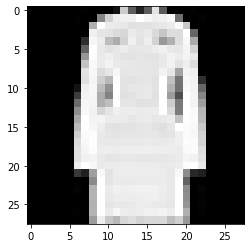

In [ ]:
plt.imshow(x_train[500][:,:,0],cmap='gray')

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Activation

In [ ]:
def build_model(hp):

  model = Sequential()
  model.add(Conv2D(hp.Int("input_units",min_value=32,max_value=256,step=32),(3,3), input_shape= x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  for i in range (hp.Int('n_layer',1,4)):
    model.add(Conv2D(hp.Int(f"conv_{i}_units",min_value=32,max_value=256,step=32),(3,3)))
    model.add(Activation('relu'))
    
  model.add(Flatten())

  model.add(Dense(10))
  model.add(Activation('softmax'))

  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

  return model

In [ ]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
!pip install -q -U keras-tuner

In [ ]:
tuner= RandomSearch(build_model,
                    objective='val_accuracy',
                    max_trials = 1,
                    executions_per_trial= 1,
                    directory = log_dir)
tuner.search(x=x_train,
            y=y_train,
            batch_size=64,
            validation_data=(x_test,y_test))

Trial 1 Complete [00h 06m 41s]
val_accuracy: 0.8669000267982483

Best val_accuracy So Far: 0.8669000267982483
Total elapsed time: 00h 06m 41s
INFO:tensorflow:Oracle triggered exit


In [ ]:
import time
log_dir = f"{int(time.time())}"

In [ ]:
print(tuner.get_best_hyperparameters()[0].values)
print(tuner.results_summary())
#print(tuner.get_best_models()[0].summary)

{'input_units': 192, 'n_layer': 2, 'conv_0_units': 160, 'conv_1_units': 32}
Results summary
Results in 1607864376/untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
input_units: 192
n_layer: 2
conv_0_units: 160
conv_1_units: 32
Score: 0.8669000267982483
None


In [ ]:
pie=np.linspace(-np.pi*3,np.pi*3)

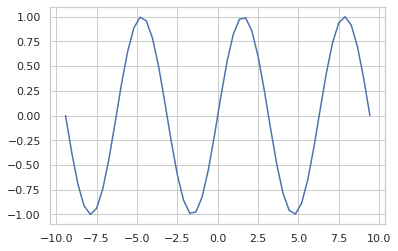

In [ ]:
sns.set(style= 'whitegrid')
plt.plot(pie,y)

In [ ]:
y=np.sin(pie)